<a href="https://colab.research.google.com/github/Gur07/fruitClassification/blob/main/M3_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### grayscale images with dropout, l2 regularization ------->3 conv+pooling layers + 3 fully connected layers + binary crossentropy/adam

# Importing data

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.57G/3.58G [00:44<00:00, 154MB/s]
100% 3.58G/3.58G [00:44<00:00, 85.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruits-fresh-and-rotten-for-classification.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [27]:

import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Dense, Activation,Dropout,Rescaling

# Arranging data

In [ ]:

def move_fruit_folder(source_dir, dest_dir, fruit_name):
    # Define the source folder path
    fruit_folder_source = os.path.join(source_dir, fruit_name)

    # Define the destination folder path
    fruit_folder_dest = os.path.join(dest_dir, fruit_name)

    # Create the destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    # Move the fruit folder
    if os.path.exists(fruit_folder_source):
        shutil.move(fruit_folder_source, fruit_folder_dest)
        print(f"Moved {fruit_folder_source} to {fruit_folder_dest}")
    else:
        print(f"Source directory {fruit_folder_source} does not exist.")

source_directory = '/path/to/your/dataset'
destination_directory = '/content/filtered_fruit_images'
fruit = 'apple'  # Specify the fruit name you are interested in

move_fruit_folder(source_directory, destination_directory, fruit)

In [6]:

new_dir_path = '/content/filtered_apple_images/test'
os.makedirs(new_dir_path, exist_ok=True)
print(f"Directory '{new_dir_path}' created successfully")

Directory '/content/filtered_apple_images/test' created successfully


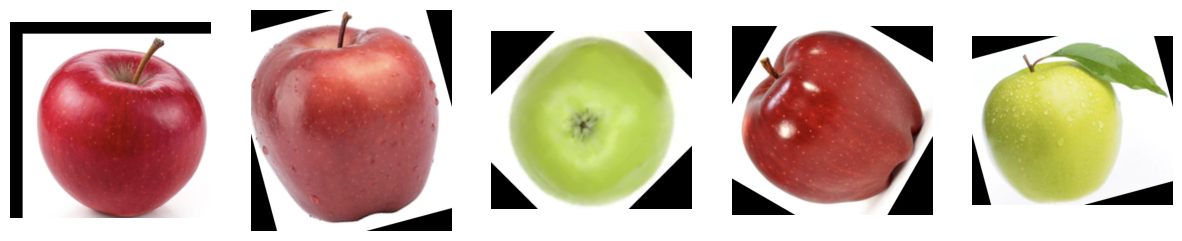

In [7]:
import random
import matplotlib.image as mpimg
def display_random_images(image_dir, num_images=5):
    # Get a list of all image files in the directory
    image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Select random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Plot the images
    plt.figure(figsize=(15, 15))
    for i, image_path in enumerate(random_images):
        img = mpimg.imread(image_path)
        plt.subplot(1, len(random_images), i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

image_directory = '/content/filtered_apple_images/train/freshapples'  # Path to your image directory
display_random_images(image_directory, num_images=5)

In [ ]:
def find_unknown_file_types(image_dir, known_extensions=None):
    if known_extensions is None:
        known_extensions = { '.jpeg', '.png'}  # Known image extensions

    # Get all files in the image directory
    all_files = os.listdir(image_dir)
    print(f"Found {len(all_files)} files in the directory.")

    # Separate known and unknown file types
    known_files = [f for f in all_files if os.path.splitext(f)[1].lower() in known_extensions]
    unknown_files = [f for f in all_files if os.path.splitext(f)[1].lower() not in known_extensions]

    # Print the results
    # print(f"Known image files ({len(known_files)}):")
    # for f in known_files:
    #     print(f)

    print(f"Unknown file types ({len(unknown_files)}):")
    for f in unknown_files:
        print(f)



# Run the function
for i in os.listdir('/content/filtered_apple_images/train'):
  print(i)
  find_unknown_file_types('/content/filtered_apple_images/train/'+i)

rottenapples
Found 2342 files in the directory.
Unknown file types (0):
freshapples
Found 1693 files in the directory.
Unknown file types (0):


In [ ]:
for i in os.listdir('/content/Fruit And Vegetable Diseases Dataset'):
  print(i)
  directory = '/content/Fruit And Vegetable Diseases Dataset/'+i
  for filename in os.listdir(directory):
    if filename.endswith('.JPG'):
        os.remove(os.path.join(directory, filename))
        print(f"Deleted {filename}")

# Grayscaling

In [ ]:

from PIL import Image

def convert_to_grayscale_and_save(source_dir, dest_dir):
    # Create destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    # Loop through all files in the source directory
    for file_name in os.listdir(source_dir):
        # Construct full file path
        file_path = os.path.join(source_dir, file_name)

        # Check if it is a file and has a valid image extension
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image using Pillow
            with Image.open(file_path) as img:
                # Convert the image to grayscale
                gray_img = img.convert('L')

                # Construct the destination file path
                gray_file_path = os.path.join(dest_dir, file_name)

                # Save the grayscale image
                gray_img.save(gray_file_path)
                print(f"Converted and saved {file_name} to grayscale.")

# Example usage
source_directory = '/content/filtered_apple_images/train/freshapples'
destination_directory = '/content/gray_apple_data/train/freshapples'

convert_to_grayscale_and_save(source_directory, destination_directory)



Converted and saved Screen Shot 2018-06-08 at 5.19.47 PM.png to grayscale.
Converted and saved translation_Screen Shot 2018-06-08 at 5.13.31 PM.png to grayscale.
Converted and saved rotated_by_15_Screen Shot 2018-06-08 at 5.22.35 PM.png to grayscale.
Converted and saved rotated_by_30_Screen Shot 2018-06-08 at 5.10.37 PM.png to grayscale.
Converted and saved rotated_by_30_Screen Shot 2018-06-08 at 5.11.08 PM.png to grayscale.
Converted and saved saltandpepper_Screen Shot 2018-06-08 at 5.14.07 PM.png to grayscale.
Converted and saved saltandpepper_Screen Shot 2018-06-08 at 5.32.43 PM.png to grayscale.
Converted and saved vertical_flip_Screen Shot 2018-06-08 at 5.23.51 PM.png to grayscale.
Converted and saved vertical_flip_Screen Shot 2018-06-08 at 5.03.34 PM.png to grayscale.
Converted and saved saltandpepper_Screen Shot 2018-06-08 at 5.29.07 PM.png to grayscale.
Converted and saved rotated_by_30_Screen Shot 2018-06-08 at 5.23.31 PM.png to grayscale.
Converted and saved rotated_by_75_Scr

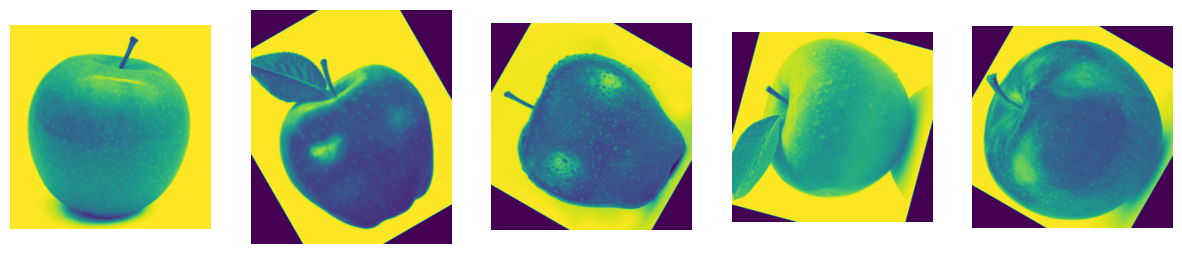

In [ ]:
display_random_images('/content/gray_apple_data/train/freshapples', num_images=5)

# Tensor

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Rescaling handled here for simplicity

train_generator = datagen.flow_from_directory(
    '/content/filtered_apple_images/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = datagen.flow_from_directory(
    '/content/filtered_apple_images/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 4035 images belonging to 2 classes.
Found 996 images belonging to 2 classes.


In [34]:
train_generator

In [11]:
data_path = '/content/filtered_apple_images'
data_test_path = '/content/filtered_apple_images/train'
data_val_path = '/content/filtered_apple_images/test'
img_size = (256,256)

In [12]:
data_train = tf.keras.utils.image_dataset_from_directory(
    directory = data_test_path,
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = 32,
    image_size = img_size,
    shuffle = True,
    color_mode='grayscale'
)

Found 4035 files belonging to 2 classes.


In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(
    directory = data_val_path,
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = 32,
    image_size = img_size,
    shuffle = True,
    color_mode='grayscale'
)

Found 996 files belonging to 2 classes.


In [17]:
data_category = data_train.class_names

In [19]:
i = 0
for element in data_train:
  if(i == 1):
    break
  print(element)
  i+=1

(<tf.Tensor: shape=(32, 256, 256, 1), dtype=float32, numpy=
array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]],


       [[[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],

In [21]:
data = keras.layers.Rescaling(1./255, offset=0.0)

# Model 1(grayscale)

In [44]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,1)))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [45]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 128)      

In [47]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
history = model1.fit(train_generator, epochs = 15, validation_data =validation_generator )

Epoch 1/15
127/127 [==============================] - 24s 174ms/step - loss: 0.6433 - accuracy: 0.6384 - val_loss: 0.6269 - val_accuracy: 0.6576
Epoch 2/15
127/127 [==============================] - 23s 177ms/step - loss: 0.5335 - accuracy: 0.7204 - val_loss: 0.4459 - val_accuracy: 0.7851
Epoch 3/15
127/127 [==============================] - 22s 175ms/step - loss: 0.4609 - accuracy: 0.7752 - val_loss: 0.6220 - val_accuracy: 0.6847
Epoch 4/15
127/127 [==============================] - 22s 175ms/step - loss: 0.3730 - accuracy: 0.8292 - val_loss: 0.5296 - val_accuracy: 0.7530
Epoch 5/15
127/127 [==============================] - 21s 165ms/step - loss: 0.3437 - accuracy: 0.8419 - val_loss: 0.4129 - val_accuracy: 0.8133
Epoch 6/15
127/127 [==============================] - 22s 170ms/step - loss: 0.2499 - accuracy: 0.8974 - val_loss: 0.3377 - val_accuracy: 0.8564
Epoch 7/15
127/127 [==============================] - 22s 174ms/step - loss: 0.1975 - accuracy: 0.9204 - val_loss: 0.2964 - val_ac

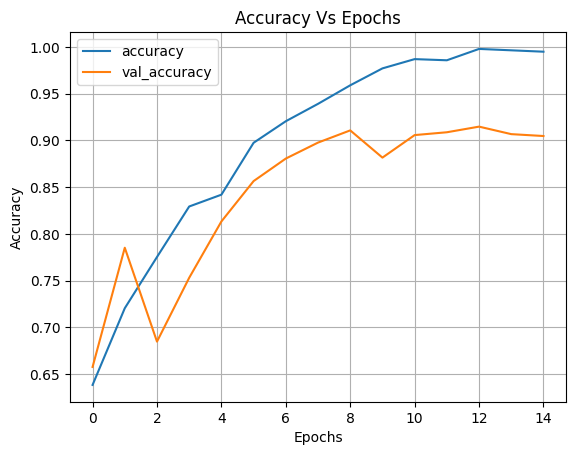

In [49]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

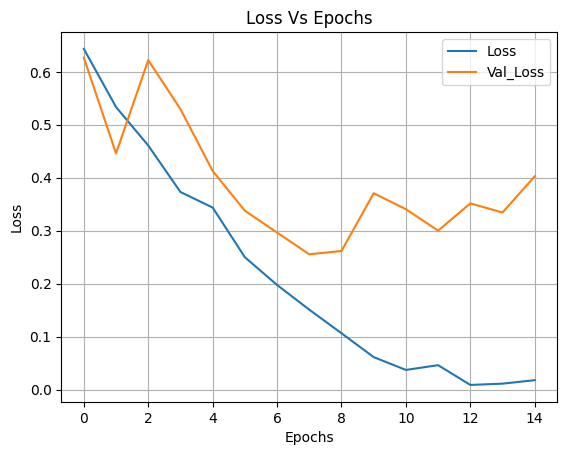

In [50]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

# Model 2(dropouts+regularization+grayscale)

In [75]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,1)))
model2.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model2.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model2.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model2.add(Flatten())

model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation = 'sigmoid'))

In [76]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 30, 30, 128)     

In [77]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
history2 = model2.fit(train_generator, epochs = 15, validation_data =validation_generator )

Epoch 1/15
127/127 [==============================] - 24s 177ms/step - loss: 0.6724 - accuracy: 0.5923 - val_loss: 0.6159 - val_accuracy: 0.6546
Epoch 2/15
127/127 [==============================] - 21s 167ms/step - loss: 0.5728 - accuracy: 0.6984 - val_loss: 0.5581 - val_accuracy: 0.6787
Epoch 3/15
127/127 [==============================] - 20s 159ms/step - loss: 0.4819 - accuracy: 0.7633 - val_loss: 0.4180 - val_accuracy: 0.8072
Epoch 4/15
127/127 [==============================] - 24s 189ms/step - loss: 0.4103 - accuracy: 0.8097 - val_loss: 0.3829 - val_accuracy: 0.8293
Epoch 5/15
127/127 [==============================] - 27s 215ms/step - loss: 0.3368 - accuracy: 0.8473 - val_loss: 0.4030 - val_accuracy: 0.8052
Epoch 6/15
127/127 [==============================] - 30s 239ms/step - loss: 0.2633 - accuracy: 0.8902 - val_loss: 0.2498 - val_accuracy: 0.8986
Epoch 7/15
127/127 [==============================] - 31s 242ms/step - loss: 0.1772 - accuracy: 0.9299 - val_loss: 0.2155 - val_ac

# Model 3(regularization)

In [79]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,1)))
model3.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model3.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model3.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model3.add(Flatten())

model3.add(Dense(128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.4))
model3.add(Dense(1, activation = 'sigmoid'))

In [80]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 30, 30, 128)     

In [81]:
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=4,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [86]:
history3 = model3.fit(train_generator, epochs = 30, validation_data =validation_generator,callbacks = callback )

Epoch 1/30
127/127 [==============================] - 22s 171ms/step - loss: 0.2927 - accuracy: 0.9177 - val_loss: 0.3888 - val_accuracy: 0.8906
Epoch 2/30
127/127 [==============================] - 21s 169ms/step - loss: 0.2936 - accuracy: 0.9115 - val_loss: 0.3734 - val_accuracy: 0.8755
Epoch 3/30
127/127 [==============================] - 21s 165ms/step - loss: 0.2879 - accuracy: 0.9160 - val_loss: 0.3558 - val_accuracy: 0.8855
Epoch 4/30
127/127 [==============================] - 22s 173ms/step - loss: 0.2848 - accuracy: 0.9150 - val_loss: 0.3370 - val_accuracy: 0.8926
Epoch 5/30
127/127 [==============================] - 22s 171ms/step - loss: 0.2623 - accuracy: 0.9261 - val_loss: 0.3609 - val_accuracy: 0.8896
Epoch 6/30
127/127 [==============================] - 22s 173ms/step - loss: 0.2684 - accuracy: 0.9212 - val_loss: 0.3320 - val_accuracy: 0.9026
Epoch 7/30
127/127 [==============================] - 24s 188ms/step - loss: 0.2641 - accuracy: 0.9259 - val_loss: 0.3276 - val_ac

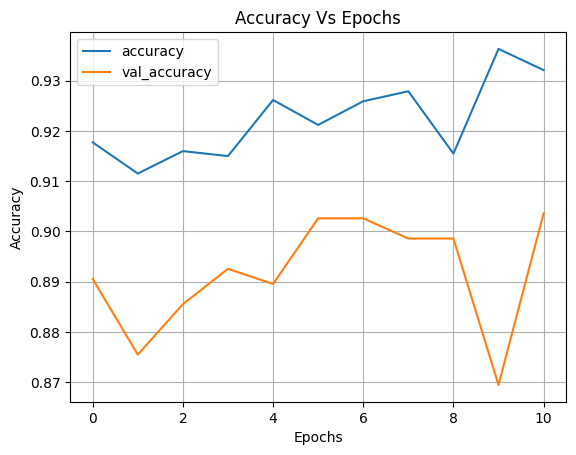

In [90]:
plt.plot(history3.history["accuracy"], label="accuracy")
plt.plot(history3.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

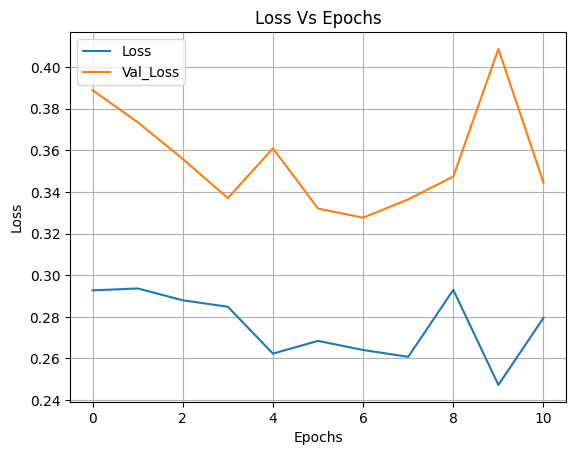

In [89]:
plt.plot(history3.history["loss"], label="Loss")
plt.plot(history3.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()